<a href="https://colab.research.google.com/github/AriannaHeartbell/sd-llm_example/blob/main/diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# パッケージのインストール
!pip install diffusers transformers omegaconf accelerate peft

In [2]:
from diffusers import DiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

# model = "stabilityai/stable-diffusion-xl-base-1.0"
model = "cagliostrolab/animagine-xl-3.0"

pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    use_safetensors=True)

pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

# cpuモード
# pipe.enable_model_cpu_offload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.26.1",
  "_name_or_path": "cagliostrolab/animagine-xl-3.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [6]:
# LoRAウェイトの読み込み
pipe.load_lora_weights(".", weight_name="inori_animagineb_xl_c3-000002.safetensors", adapter_name="inori")
pipe.load_lora_weights(".", weight_name="hbrstyle2_animgaineb_xl_c3-000002.safetensors", adapter_name="hbrstyle2")
pipe.set_adapters(["inori", "hbrstyle2"], adapter_weights=[0.85, 0.7])

ValueError: Adapter name inori already in use in the Unet - please select a new adapter name.

In [7]:
pipe.set_adapters(["inori", "hbrstyle2"], adapter_weights=[0.85, 0.7])

  0%|          | 0/27 [00:00<?, ?it/s]

(-0.5, 895.5, 1343.5, -0.5)

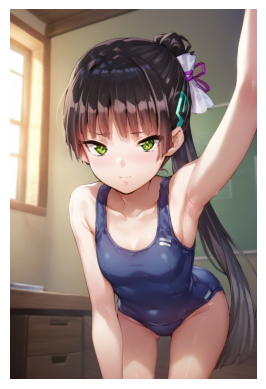

In [14]:
import matplotlib.pyplot as plt

prompt = "1girl, hbrinori, (flashback, nostalgic light), inori hairclip, inori high ponytail, leaning forward, seductive pose, inori hair ribbon, inori hair ornament, school swimsuits, sleeveless, armpit, pov, ((masterpiece, best quality))"
negative_prompt = "nsfw, lowres, bad anatomy, bad hands, bad eyes, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, artist name, multiple girls, 2girls, missing hands, hair intake, small breasts, medium breasts, extra fingers, wide shot, long shot"

# デフォルトサイズ(1024x1024)

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    guidance_scale=6,
    num_inference_steps=27,
    height=1344,
    width=896
    ).images[0]

image.save("output.png")

plt.imshow(image)
plt.axis('off')